In [1]:
import os, sys
sys.path.insert(1, os.path.abspath('..'))
from hypara import *

In [2]:
para = to_space({
    'alpha' : R,
    'l1_ratio' : R,
    'maxorder' : N[1:],
    'bias' : {True, False},})

In [3]:
d = to_space({
    'lambda' : R,
    'gamma' : N[0:],
})

In [4]:
op1 = Operator(lambda a,b,c : a+b*c, 'dings')
op2 = Operator(lambda a : a**2, 'quad')

p = to_space({
    op1(a=N[:10], b=N[:10], c=N[:10]),
    op2(N[:10]),
    op1(1, foo='sahne'),
})

In [5]:
K = to_space({'RBF', 'LIN'})
G = to_space()
G <<= mul(K, K) | add(K, K) | K

In [34]:
C = to_space({2,3})
A = join(to_space(1))
xydiv = Operator(lambda x,y : x/y, 'xydiv')
B = xydiv(x=A, y=C)
A <<= A*C
list_ = lambda *args : list(args) 
G2 = Operator(list_, 'list')(A,B)


In [35]:
pprint(G2)

list(
    {
        1,
        mul(
            JoinedSpace ...,
            {2, 3},
        ),
    },
    xydiv(
        y = {2, 3},
        x = {
            1,
            mul(
                JoinedSpace ...,
                {2, 3},
            ),
        },
    ),
)


In [36]:
s = sample(G2)
s

<class 'hypara.core.spaces.CallSpace'>
match
<class 'hypara.core.spaces.CallSpace'>
match
<class 'hypara.core.spaces.CallSpace'>
match
<class 'hypara.core.spaces.CallSpace'>
match


Call(Call(1, 3), Call(y=3, x=Call(1, 3)))

In [37]:
compute(s)

[3, 1.0]

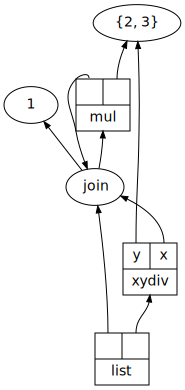

In [38]:
to_dot(G2)

In [40]:
# space to flat space